In [1]:
using LaplaceRedux.Data
using Flux
x, y = Data.toy_data_multi()
X = hcat(x...)
y_train = Flux.onehotbatch(y, unique(y))
y_train = Flux.unstack(y_train',1)

[ Info: Precompiling LaplaceRedux [c52c1a26-f7c5-402b-80be-ba1e638ad478]
┌ Warning: The NVIDIA driver on this system only supports up to CUDA 11.1.0.
│ For performance reasons, it is recommended to upgrade to a driver that supports CUDA 11.2 or higher.
└ @ CUDA C:\Users\Lenovo\.julia\packages\CUDA\s0e3j\src\initialization.jl:70


100-element Vector{Vector{Bool}}:
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 ⋮
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]

In [2]:
println(X)
println()

[4.430192732041823 2.749858942964411 2.567424667110799 1.1235287409392671 5.116217648992477 5.435841651757191 2.8385462338630507 4.577470501216961 1.2253963742086835 2.16523496726502 1.6376558532098455 4.9399869200821485 3.9443354290543624 2.785764829911678 5.360067472355902 2.7070930124829458 4.261799773707685 3.269000568392214 4.537082467120728 4.301722478998401 3.2575440965773987 5.478895124810453 1.1819657218881547 5.3540129564819585 1.660330295470021 -5.935917244746972 -4.754698020098057 -5.091998072950697 -4.459058175576856 -6.773113066573435 -5.2195103038437285 -4.372548672927529 -4.244500710601455 -3.6721889897917004 -4.107982656298415 -2.775563780182053 -3.8551405169375785 -6.1545424508744215 -6.110554185706034 -5.117268957875414 -4.788046303710569 -4.880871001560067 -3.343497343644148 -5.224889409697589 -5.923110121164443 -6.048032423129766 -4.176390437718265 -5.3336449584592485 -3.7164146430550846 -6.870392545514568 4.887050237165584 4.288517369658009 2.2915950087101526 2.40

In [3]:
println(x)
println()

[[4.430192732041823, 2.440507813023088], [2.749858942964411, 2.4453006771965065], [2.567424667110799, 1.7668246132746], [1.1235287409392671, 1.9937665399521218], [5.116217648992477, 2.418724255058337], [5.435841651757191, 4.140934676793597], [2.8385462338630507, 4.8422811734284075], [4.577470501216961, 2.1470287014435234], [1.2253963742086835, 3.1624800724446653], [2.16523496726502, 3.3365821176021657], [1.6376558532098455, 4.525630059111124], [4.9399869200821485, 1.5868556148734922], [3.9443354290543624, 4.584595526742531], [2.785764829911678, 3.820672690223273], [5.360067472355902, 2.615744704177721], [2.7070930124829458, 3.1561158458068737], [4.261799773707685, 2.430743866578465], [3.269000568392214, 1.8707489439374276], [4.537082467120728, 4.390979511364435], [4.301722478998401, 2.527328550837417], [3.2575440965773987, 1.623715124592666], [5.478895124810453, 2.045361683595723], [1.1819657218881547, 1.2135882621998546], [5.3540129564819585, 3.111559749243308], [1.660330295470021, 1.

In [4]:
data = zip(x,y_train)
n_hidden = 3
D = size(X,1)
out_dim = length(unique(y))
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, out_dim)
)  
loss(x, y) = Flux.Losses.logitcrossentropy(nn(x), y)

loss (generic function with 1 method)

In [5]:
println(data)

zip([[4.430192732041823, 2.440507813023088], [2.749858942964411, 2.4453006771965065], [2.567424667110799, 1.7668246132746], [1.1235287409392671, 1.9937665399521218], [5.116217648992477, 2.418724255058337], [5.435841651757191, 4.140934676793597], [2.8385462338630507, 4.8422811734284075], [4.577470501216961, 2.1470287014435234], [1.2253963742086835, 3.1624800724446653], [2.16523496726502, 3.3365821176021657], [1.6376558532098455, 4.525630059111124], [4.9399869200821485, 1.5868556148734922], [3.9443354290543624, 4.584595526742531], [2.785764829911678, 3.820672690223273], [5.360067472355902, 2.615744704177721], [2.7070930124829458, 3.1561158458068737], [4.261799773707685, 2.430743866578465], [3.269000568392214, 1.8707489439374276], [4.537082467120728, 4.390979511364435], [4.301722478998401, 2.527328550837417], [3.2575440965773987, 1.623715124592666], [5.478895124810453, 2.045361683595723], [1.1819657218881547, 1.2135882621998546], [5.3540129564819585, 3.111559749243308], [1.660330295470021

In [6]:
using Flux.Optimise: update!, Adam
using Statistics
opt = Adam()
epochs = 100
avg_loss(data) = mean(map(d -> loss(d[1],d[2]), data))
show_every = epochs/10

for epoch = 1:epochs
    for d in data
        gs = gradient(Flux.params(nn)) do
            l = loss(d...)
        end
        update!(opt, Flux.params(nn), gs)
    end
    if epoch % show_every == 0
        println("Epoch " * string(epoch))
        @show avg_loss(data)
    end
end

Epoch 10

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(2 => 3, σ)    # 9 parameters
│   summary(x) = "2-element Vector{Float64}"
└ @ Flux C:\Users\Lenovo\.julia\packages\Flux\FWgS0\src\layers\stateless.jl:50



avg_loss(data) = 0.95561063f0
Epoch 20
avg_loss(data) = 0.62931556f0
Epoch 30
avg_loss(data) = 0.4334774f0
Epoch 40
avg_loss(data) = 0.31378093f0
Epoch 50
avg_loss(data) = 0.23344263f0
Epoch 60
avg_loss(data) = 0.17660794f0
Epoch 70
avg_loss(data) = 0.13513683f0
Epoch 80
avg_loss(data) = 0.10427037f0
Epoch 90
avg_loss(data) = 0.08098404f0
Epoch 100
avg_loss(data) = 0.06324491f0


In [7]:
using LaplaceRedux
la = Laplace(nn; likelihood=:classification)
fit!(la, data)
optimize_prior!(la; verbose=true, n_steps=1000)

loss(exp.(logP₀), exp.(logσ)) = 15.641449423489277
Log likelihood: -6.3244905062019825
Log det ratio: 12.847652817970769
Scatter: 5.78626501660382
loss(exp.(logP₀), exp.(logσ)) = 15.614847569178107
Log likelihood: -6.3244905062019825
Log det ratio: 13.48102755826973
Scatter: 5.09968656768252
loss(exp.(logP₀), exp.(logσ)) = 15.614822196888358
Log likelihood: -6.3244905062019825
Log det ratio: 13.50187132206841
Scatter: 5.078792059304341


[ Info: Iteration 100: P₀=0.04098334959676279, σ=1.0
[ Info: Iteration 200: P₀=0.036120405276549084, σ=1.0
[ Info: Iteration 300: P₀=0.03597241223802455, σ=1.0
[ Info: Iteration 400: P₀=0.03597260131920236, σ=1.0


loss(exp.(logP₀), exp.(logσ)) = 15.614822196847642
Log likelihood: -6.3244905062019825
Log det ratio: 13.501844626418773
Scatter: 5.078818754872547
loss(exp.(logP₀), exp.(logσ)) = 15.614822196847673
Log likelihood: -6.3244905062019825
Log det ratio: 13.501844934125259
Scatter: 5.078818447166123
loss(exp.(logP₀), exp.(logσ)) = 15.614822196847651
Log likelihood: -6.3244905062019825
Log det ratio: 13.50184493144036
Scatter: 5.07881844985098
loss(exp.(logP₀), exp.(logσ)) = 15.614822196847653
Log likelihood: -6.3244905062019825
Log det ratio: 13.501844931434377
Scatter: 5.078818449856965


[ Info: Iteration 500: P₀=0.03597259913975847, σ=1.0
[ Info: Iteration 600: P₀=0.03597259915877495, σ=1.0
[ Info: Iteration 700: P₀=0.03597259915881735, σ=1.0


loss(exp.(logP₀), exp.(logσ)) = 15.614822196847676
Log likelihood: -6.3244905062019825
Log det ratio: 13.501844931434462
Scatter: 5.078818449856925
loss(exp.(logP₀), exp.(logσ)) = 15.614822196847676
Log likelihood: -6.3244905062019825
Log det ratio: 13.501844931434462
Scatter: 5.078818449856925
loss(exp.(logP₀), exp.(logσ)) = 15.614822196847669
Log likelihood: -6.3244905062019825
Log det ratio: 13.501844931434448
Scatter: 5.078818449856927


[ Info: Iteration 800: P₀=0.035972599158817065, σ=1.0
[ Info: Iteration 900: P₀=0.035972599158817065, σ=1.0
[ Info: Iteration 1000: P₀=0.03597259915881708, σ=1.0


[4.430192732041823 2.749858942964411 2.567424667110799 1.1235287409392671 5.116217648992477 5.435841651757191 2.8385462338630507 4.577470501216961 1.2253963742086835 2.16523496726502 1.6376558532098455 4.9399869200821485 3.9443354290543624 2.785764829911678 5.360067472355902 2.7070930124829458 4.261799773707685 3.269000568392214 4.537082467120728 4.301722478998401 3.2575440965773987 5.478895124810453 1.1819657218881547 5.3540129564819585 1.660330295470021 -5.935917244746972 -4.754698020098057 -5.091998072950697 -4.459058175576856 -6.773113066573435 -5.2195103038437285 -4.372548672927529 -4.244500710601455 -3.6721889897917004 -4.107982656298415 -2.775563780182053 -3.8551405169375785 -6.1545424508744215 -6.110554185706034 -5.117268957875414 -4.788046303710569 -4.880871001560067 -3.343497343644148 -5.224889409697589 -5.923110121164443 -6.048032423129766 -4.176390437718265 -5.3336449584592485 -3.7164146430550846 -6.870392545514568 4.887050237165584 4.288517369658009 2.2915950087101526 2.40

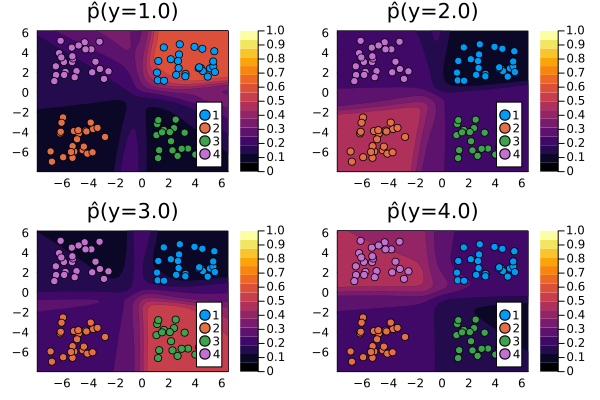

In [8]:
using Plots
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1))
    push!(plt_list, plt)
end
plot(plt_list...)

In [15]:
predictions_probit = predict(la, X)
println(reduce(hcat, predictions_probit))

[0.5915357374007316 0.07711758947173908 0.11000333851548882 0.2213433346120404 0.5951269042530383 0.07624819654169764 0.10931749777805719 0.2193074014272069 0.5835767997390807 0.07842046591447188 0.11375478551708125 0.22424794882936613 0.5226028029170962 0.08899798325904727 0.13266205606277967 0.2557371577610768 0.5901568960527718 0.07742198209142545 0.11038897094931265 0.22203215090649006 0.5884206491184534 0.07766417480887981 0.11068597626947102 0.22322919980319564 0.5895529338376597 0.07744790207883495 0.11036886663469243 0.2226302974488129 0.5917125281352992 0.07722006485870678 0.11016797171210539 0.2208994352938886 0.5848922733623801 0.07829821348446908 0.1120415840678818 0.22476792908526902 0.5949608165940528 0.07633626993816517 0.10906751674049354 0.21963539672728852 0.5906916914541488 0.07735261626132685 0.10985233430298509 0.22210335798153924 0.5853785525867696 0.08089719761681644 0.11468209387109385 0.2190421559253201 0.5888612663729089 0.07757766920182278 0.11056908907776226

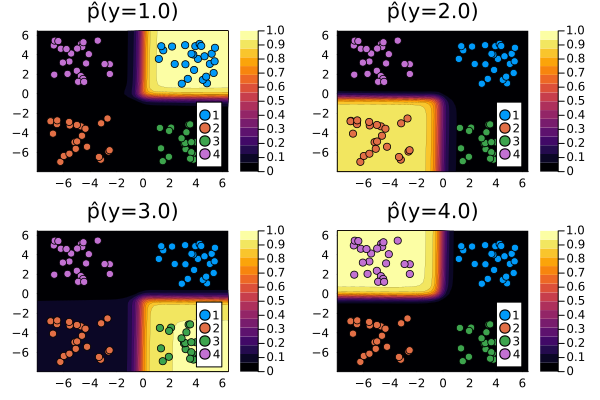

In [6]:
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1), link_approx=:plugin)
    push!(plt_list, plt)
end
plot(plt_list...)

In [16]:
predictions_plugin = predict(la, X, link_approx=:plugin)
println(reduce(hcat, predictions_plugin))

Float32[0.9711771 0.00038240323 0.0011741647 0.027266376 0.9683347 0.000422206 0.0013277328 0.029915288 0.96229327 0.000523938 0.0017330705 0.035449695 0.9355619 0.00092521525 0.003174163 0.06033865 0.9715009 0.00037845346 0.001158706 0.026961928 0.9718617 0.00036975654 0.0011268933 0.026641596 0.9716622 0.00037262432 0.0011355983 0.026829483 0.97099924 0.00038890558 0.0011975697 0.027414232 0.9630796 0.0005011152 0.0014797803 0.0349395 0.96954006 0.00040322135 0.001244619 0.028812021 0.97025585 0.0003943268 0.0011660649 0.028183768 0.9705052 0.00042545845 0.0013271419 0.027742267 0.9718016 0.00037058565 0.0011299632 0.02669786 0.97116977 0.00037964675 0.0011625757 0.027288035 0.971648 0.00037495318 0.0011458717 0.026831219 0.9702499 0.0003929647 0.0012136252 0.028143475 0.9710452 0.0003842613 0.0011813234 0.027389226 0.9676614 0.00044218468 0.0014042163 0.030492274 0.9718313 0.00037016888 0.0011284567 0.026670074 0.9711648 0.00038187948 0.0011724351 0.027280806 0.9661036 0.00047825754